In [1]:
import rasterio
import numpy as np
import collections
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import earthpy.plot as ep
src = rasterio.open('L1C_T43REK_A029303_20221016T053343.tif')
data = src.read(1)
print(np.unique(data))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 227 228 230 233 234 243 244 247 252
 255]


<Axes: >

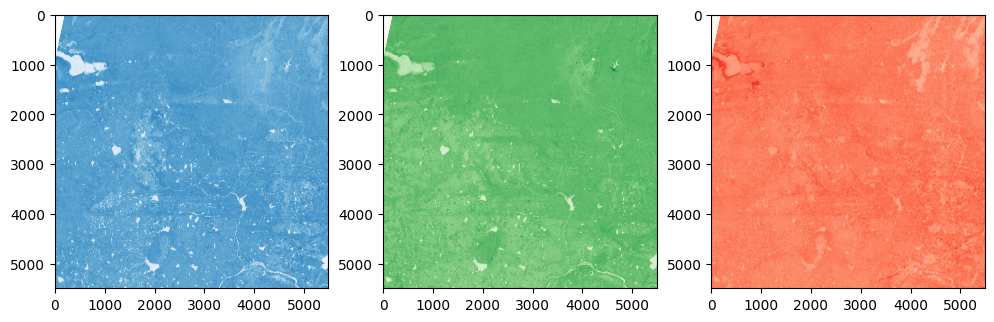

In [12]:
from rasterio import plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(src.read(1), ax=ax1, cmap='Blues')
plot.show(src.read(2), ax=ax2, cmap='Greens')
plot.show(src.read(3), ax=ax3, cmap='Reds')


In [36]:
# Open the Sentinel-2 image

nir_band = src.read(2)  # Adjust band indices as needed
red_band = src.read(3)  # Adjust band indices as needed

# Calculate NDWI and NDVI
ndwi = (nir_band - red_band) / (nir_band + red_band)
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Define threshold values (you may need to adjust these)
water_threshold = 0.1
forest_threshold = 0.2

# Calculate the percentage of water and forest pixels
water_percentage = (ndvi <= water_threshold).mean() * 100
forest_percentage = (ndvi > forest_threshold).mean() * 100

print(f"Percentage of Water: {water_percentage:.2f}%")
print(f"Percentage of Forest: {forest_percentage:.2f}%")

C:\Users\punit\AppData\Local\Temp\ipykernel_25348\2269152298.py:7: RuntimeWarning: divide by zero encountered in divide
  ndwi = (nir_band - red_band) / (nir_band + red_band)
C:\Users\punit\AppData\Local\Temp\ipykernel_25348\2269152298.py:7: RuntimeWarning: invalid value encountered in divide
  ndwi = (nir_band - red_band) / (nir_band + red_band)
C:\Users\punit\AppData\Local\Temp\ipykernel_25348\2269152298.py:8: RuntimeWarning: divide by zero encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)
C:\Users\punit\AppData\Local\Temp\ipykernel_25348\2269152298.py:8: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)


Percentage of Water: 9.25%
Percentage of Forest: 33.46%


In [7]:
data.shape

(5490, 5490)

In [8]:
unique, frequency = np.unique(data,return_counts = True)
print(unique)
print(frequency)
print(len(data))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 227 228 230 233 234 243 244 247 252
 255]
[ 84321   1117    107    686    414    119   

In [ ]:

cmap_values = [
  0,   # No input data available
  20,  # Shrubs
  30,  # Herbaceous vegetation
  40,  # Cultivated and managed vegetation/agriculture (cropland)
  50,  # Urban / built up
  60,  #	Bare / sparse vegetation
  70,  #	Snow and Ice
  80,  #	Permanent water bodies
  90,  #	Herbaceous wetland
  100, #	Moss and lichen
  111, # Closed forest, evergreen needle leaf
  112, # Closed forest, evergreen, broad leaf
  113, # Closed forest, deciduous needle leaf
  114, #	Closed forest, deciduous broad leaf
  115, # Closed forest, mixed
  116, # Closed forest, unknown
  121, #	Open forest, evergreen needle leafs
  122, # Open forest, evergreen broad leaf
  123, #	Open forest, deciduous needle leaf
  124, #	Open forest, deciduous broad leaf
  125, # Open forest, mixed
  126, # Open forest, unknown
  200  # Open sea
  ]

cmap_colors =[
  0x282828,   # No input data available
  0xffbb22,  # Shrubs
  0xffff4c,  # Herbaceous vegetation
  0xf096ff,  # Cultivated and managed vegetation/agriculture (cropland)
  0xfa0000,  # Urban / built up
  0xb4b4b4,  #	Bare / sparse vegetation
  0xf0f0f0,  #	Snow and Ice
  0x0032c8,  #	Permanent water bodies
  0x0096a0,  #	Herbaceous wetland
  0xfae6a0, #	Moss and lichen
  0x58481f, # Closed forest, evergreen needle leaf
  0x009900, # Closed forest, evergreen, broad leaf
  0x70663e, # Closed forest, deciduous needle leaf
  0x00cc00, #	Closed forest, deciduous broad leaf
  0x4e751f, # Closed forest, mixed
  0x007800, # Closed forest, unknown
  0x666000, #	Open forest, evergreen needle leafs
  0x8db400, # Open forest, evergreen broad leaf
  0x8d7400, #	Open forest, deciduous needle leaf
  0xa0dc00, #	Open forest, deciduous broad leaf
  0x929900, # Open forest, mixed
  0x648c00, # Open forest, unknown
  0x000080  # Open sea
]


cmap = ListedColormap(cmap_colors)



In [37]:
cmap_values = [0, 50, 40, 33, 121, 20, 116, 200]
cmap_colors = ['white', ## 0: No Data
               'black', ## 11: urban 
               'darkorange', ## 22: Cropland
               'brown', ## 33: Pasture
               'darkgreen', ## 40: Forest
               'purple', ## 55: Grass
               'gray', ## 66: Other land
               'blue'  ## 77: water
              ] 
cmap = ListedColormap(cmap_colors)
value_text = ['No Data', 'Urban', 'Cropland', 'Pasture', 
             'Forest', 'Grass/shrubland', 
             'Other land', 'Water']



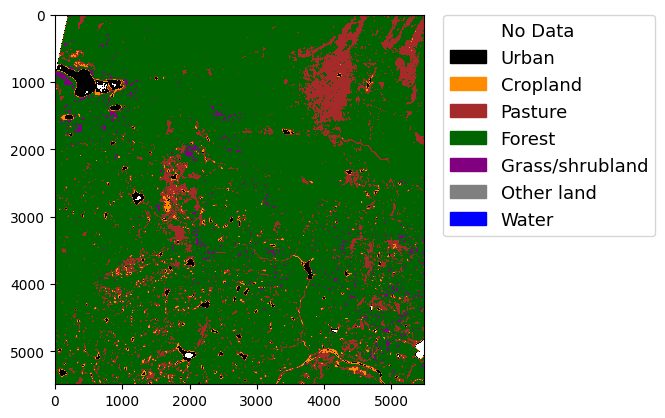

In [38]:
f,ax=plt.subplots()
im = ax.imshow(data, cmap=cmap)
class1=ep.draw_legend(im, titles=value_text, classes=cmap_values)

In [11]:
print("% of No Data ="+str((frequency[0]/(data[0]*data[1]))))
print("% of Urban ="+str((frequency[11]/(data[0]*data[1]))))
print("% of No Data ="+str((frequency[0]/(data[0]*data[1]))))

% of No Data =[          inf           inf           inf ...  458.26630435  409.32524272
 2007.64285714]
% of Urban =[       inf        inf        inf ... 0.34782609 0.31067961 1.52380952]
% of No Data =[          inf           inf           inf ...  458.26630435  409.32524272
 2007.64285714]


C:\Users\punit\AppData\Local\Temp\ipykernel_5564\543857108.py:1: RuntimeWarning: divide by zero encountered in divide
  print("% of No Data ="+str((frequency[0]/(data[0]*data[1]))))
C:\Users\punit\AppData\Local\Temp\ipykernel_5564\543857108.py:2: RuntimeWarning: divide by zero encountered in divide
  print("% of Urban ="+str((frequency[11]/(data[0]*data[1]))))
C:\Users\punit\AppData\Local\Temp\ipykernel_5564\543857108.py:3: RuntimeWarning: divide by zero encountered in divide
  print("% of No Data ="+str((frequency[0]/(data[0]*data[1]))))


In [18]:
print(data)

[[  0   0   0 ... 121 122 118]
 [  0   0   0 ... 120 115 111]
 [  0   0   0 ... 119 116 112]
 ...
 [149 148 148 ... 148 146 143]
 [150 151 150 ... 148 142 138]
 [153 154 153 ... 146 138 133]]
